In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import tools

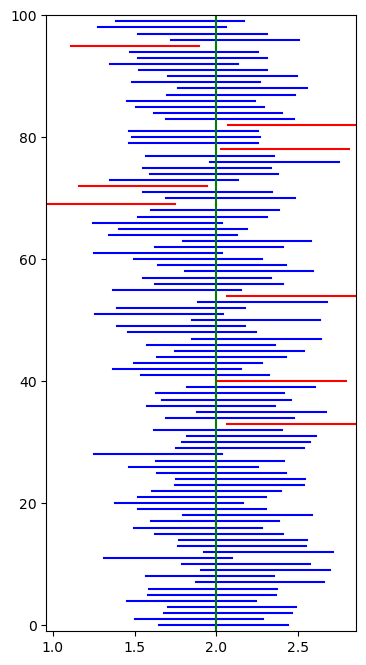

In [2]:
## Problem 1: Simulering av konfidensintervall
# Parametrar
# Antal mätningar
n = 25
# Väntevärdet
mu = 2
# Standardavvikelsen
sigma = 1
# Ett minus konfidensgraden
alpha = 0.05
# Antal intervall
m = 100
# Simulera n observationer för varje intervall.
x = stats.norm.rvs(loc=mu, scale=sigma, size=(m, n))
# Skatta mu med medelvärdet.
xbar = np.mean(x, axis=-1)
# Beräkna kvantilerna och standardavvikelsen för
# medelvärdet.
lambda_alpha_2 = stats.norm.ppf(1 - alpha / 2)
D = sigma / np.sqrt(n)
# Beräkna undre och övre gränserna.
undre = xbar - lambda_alpha_2 * D
övre = xbar + lambda_alpha_2 * D

# Skapa en figur med storlek 4 × 8 tum.
plt.figure(figsize=(4, 8))
# Rita upp alla intervall
for k in range(m):
# Rödmarkera alla intervall som missar mu.
    if övre[k] < mu or undre[k] > mu:
        color = "r"
    else:
        color = "b"
    plt.plot([undre[k], övre[k]], [k, k], color)
# Fixa till gränserna så att figuren ser lite bättre ut.
b_min = np.min(undre)
b_max = np.max(övre)
plt.axis([b_min, b_max, -1, m])
# Rita ut det sanna värdet.
plt.plot([mu, mu], [-1, m], "g")
# Visa plotten.
plt.show()

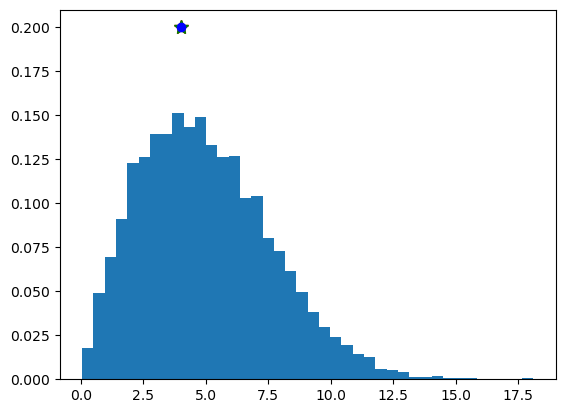

In [3]:
## Problem 2: Maximum likelihood, minsta kvadrat
M = 10000
b = 4
# Simulera M utfall med parameter b.
x = stats.rayleigh.rvs(scale=b, size=M)
# Skapa figur och plotta histogrammet.
plt.figure()
plt.hist(x, 40, density=True)
est_ml = np.sqrt(np.sum(x**2) / (2*len(x))) # Skriv din ML-skattning här
est_mk = np.mean(x) / np.sqrt(np.pi/2) # Skriv din MK-skattning här
# Plotta de två skattningarna.
plt.plot(est_ml, 0.2, "r*", markersize=10)
plt.plot(est_mk, 0.2, "g*", markersize=10)
plt.plot(b, 0.2, "bo")
plt.show()

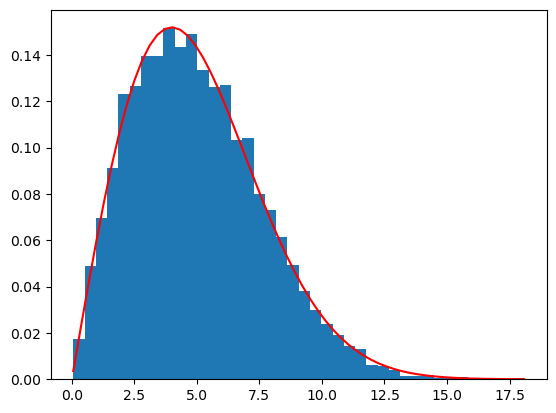

In [9]:
# Skapa figur.
plt.figure()
# Visa histogrammet.
plt.hist(x, 40, density=True)
# Plotta täthetsfunktionen för den skattade parametern.
x_grid = np.linspace(np.min(x), np.max(x), 60)
pdf = stats.rayleigh.pdf(x_grid, scale=est_ml)
plt.plot(x_grid, pdf, "r")
plt.show()

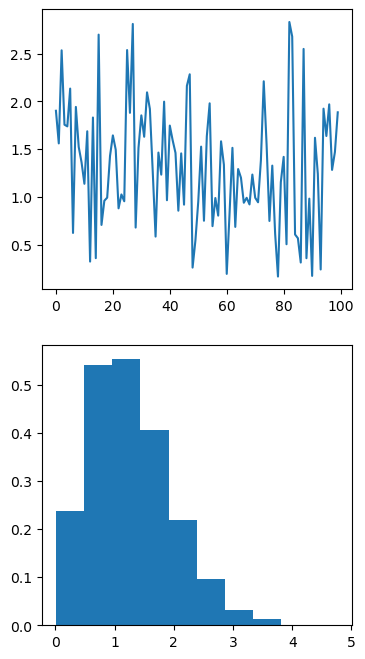

In [14]:
## Problem 3: Konfidensintervall for Rayleighfordelning
# Ladda data.
y = np.loadtxt("wave_data.txt")
# Plotta en bit av signalen samt histogrammet.
plt.figure(figsize=(4, 8))
plt.subplot(2, 1, 1)
plt.plot(y[:100])
plt.subplot(2, 1, 2)
plt.hist(y, density=True)
plt.show()